In [1]:
import os
import pandas as pd
from track_recommender.utils import path_base

In [2]:
df = pd.read_csv(
    os.path.join(os.path.dirname(os.getcwd()),"data","streams.csv"), sep=";",index_col=0)

In [3]:
df["endTime"] = pd.to_datetime(df["endTime"])
df["date"] = df["endTime"].apply(lambda ts: ts.date())
df['month_year'] = df['endTime'].dt.to_period('M')

df.rename(columns={"artistName": "artist_name", "trackName": "track_name"}, inplace=True)

In [4]:
df.describe(include='all')

/tmp/ipykernel_1612/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,endTime,artist_name,track_name,msPlayed,date,month_year
count,43760,43760,43760,4.376000e+04,43760,43760
unique,31444,3282,8532,NaN,757,34
top,2022-01-15 15:47:00,IDLES,Pia,NaN,2021-08-16,2022-01
freq,50,782,101,NaN,360,2704
first,2019-03-31 21:27:00,NaN,NaN,NaN,NaN,NaN
last,2022-08-16 17:09:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.663403e+05,NaN,NaN
std,NaN,NaN,NaN,1.892894e+05,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,3.362100e+04,NaN,NaN


In [5]:
list(df)

['endTime', 'artist_name', 'track_name', 'msPlayed', 'date', 'month_year']

In [6]:
import matplotlib.pyplot as plt

In [7]:
df_plays_per_date = df.groupby(['month_year']).size().reset_index().rename(columns={0: "plays"})


<AxesSubplot:xlabel='month_year'>

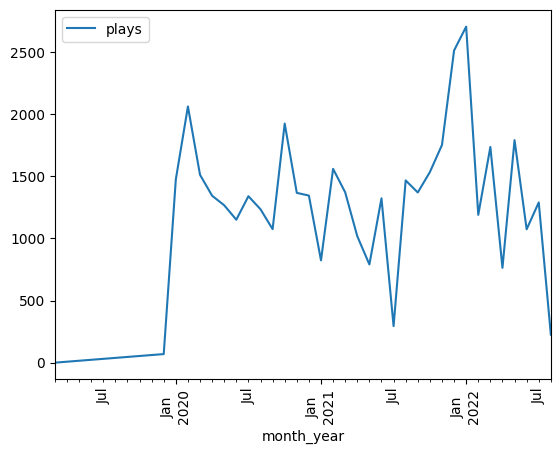

In [8]:
df_plays_per_date.plot(
    x="month_year", y="plays", kind="line",  rot=90
)

In [9]:
df2 = df.groupby(['month_year', "artist_name"]).size().reset_index().rename(columns={0: "plays"})

In [10]:

# count = 0

# for name in df2["artist_name"].tolist():

#     df3 = df2[df2["artist_name"] == name]
#     df3.plot(x="month_year", y="plays", title=name, kind="line")

#     count += 1


#     if count > 3:
#         break


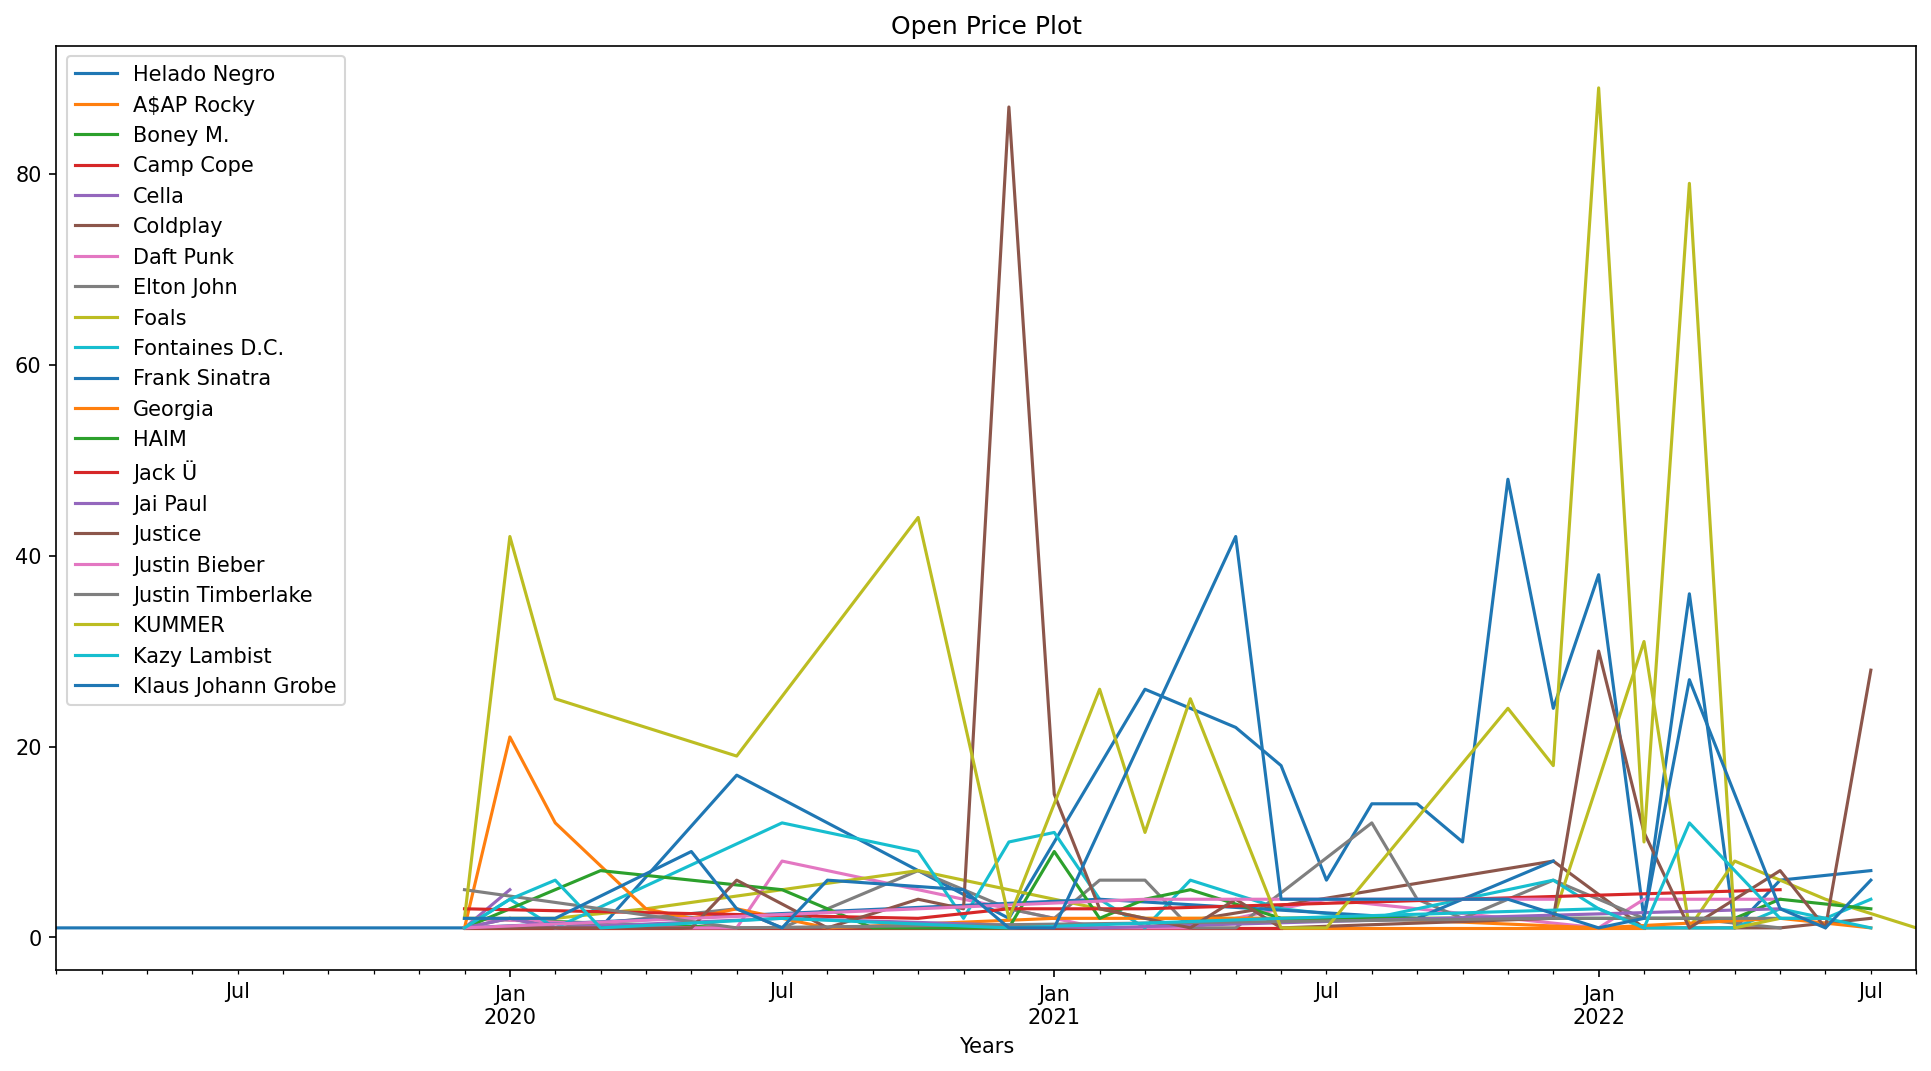

In [11]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)


count = 0

df2 = df2.reset_index().set_index('month_year')

for name in df2["artist_name"].tolist():

    df3 = df2[df2["artist_name"] == name]
    df3["plays"].plot(label=name, kind="line")

    count += 1


    if count > 20:
        break

plt.title('Open Price Plot')
plt.xlabel('Years')
plt.legend()

In [12]:
df_artist = df.groupby(['artist_name']).size().reset_index().rename(columns={0: "plays"})


In [13]:
df_artist = df_artist.sort_values(by="plays", ascending=False).head(70)


<AxesSubplot:xlabel='artist_name'>

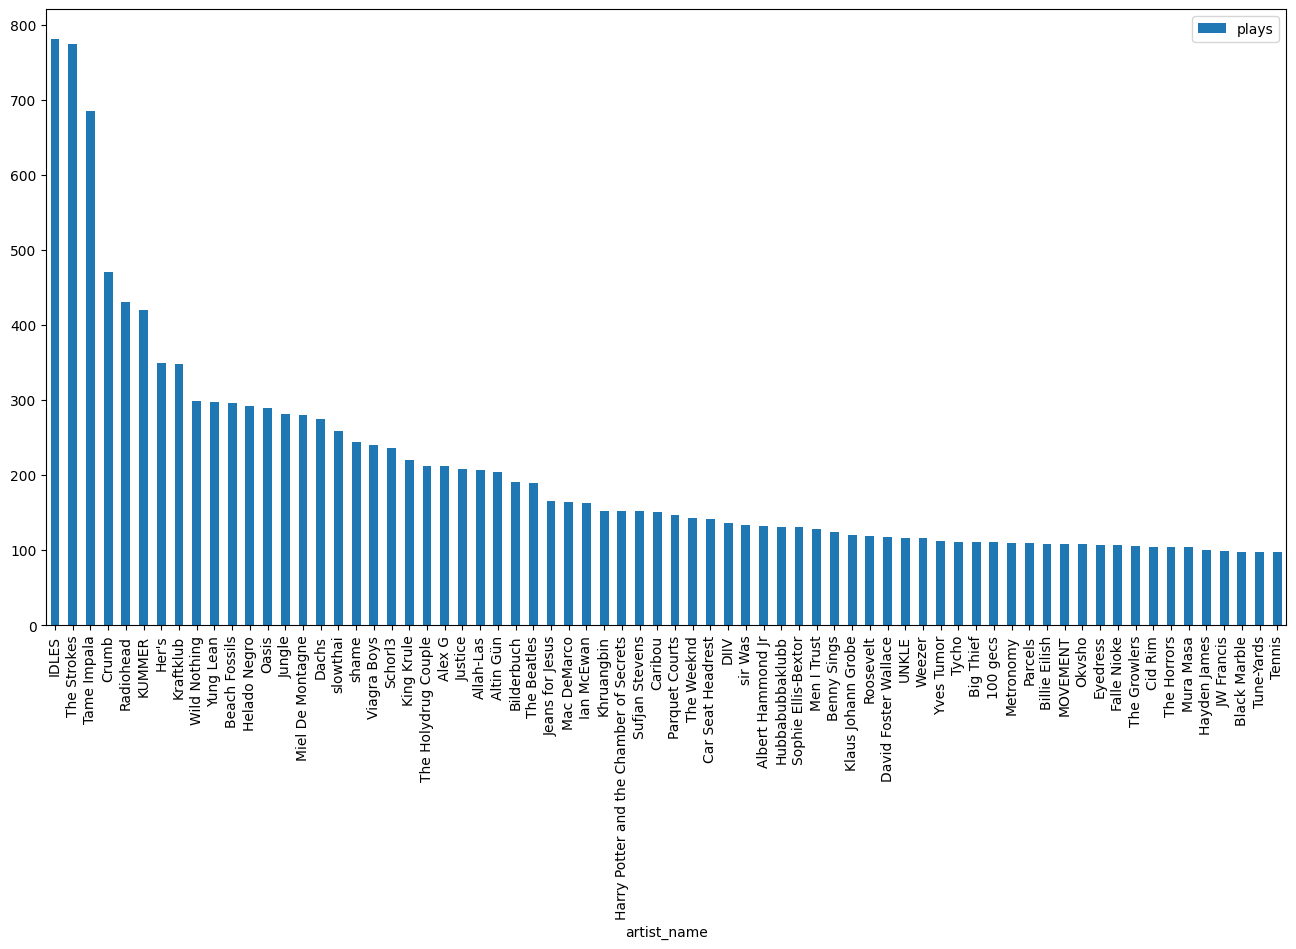

In [14]:
df_artist.plot.bar(x='artist_name', y='plays', rot=90, figsize=(16, 8))

In [15]:
df_track_artist = df.groupby(['track_name', "artist_name"]).size().reset_index().rename(columns={0: "plays"})

In [16]:
# df_track_artist.plot.bar(x='artist_name', y='plays', rot=90, figsize=(16, 8))

<AxesSubplot:>

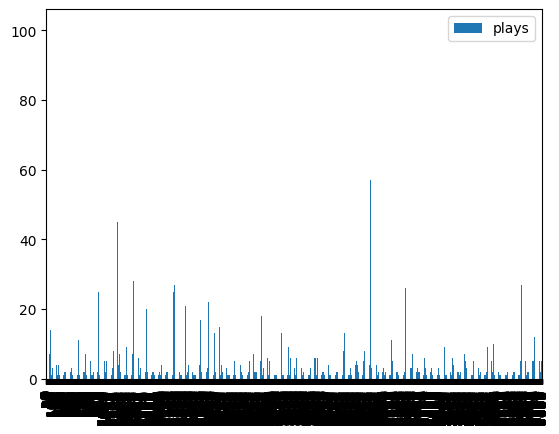

In [17]:
df_track_artist.plot.bar(stacked=True)

<AxesSubplot:xlabel='artist_name'>

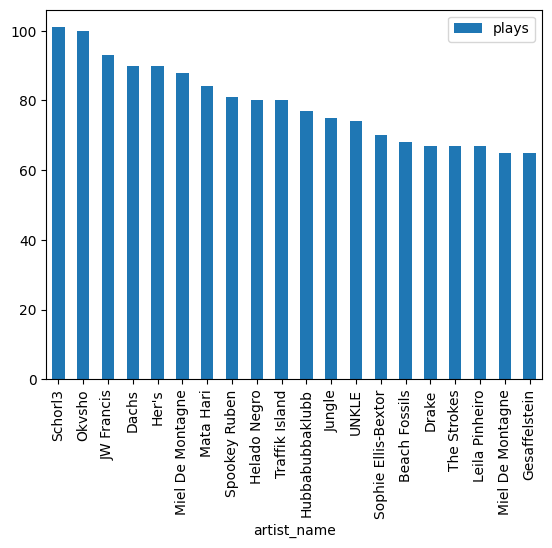

In [25]:
df_track_artist.sort_values("plays", ascending=False).head(20).plot.bar(x="artist_name", stacked=True)

In [27]:
df_track_artist.sort_values("artist_name", ascending=False).head(20)

,track_name,artist_name,plays
8849,・-・・ ・ - ・・ - --・ ---,･ ･－･ ･－ ･･･ ･ －･･,8
3451,I DON'T CARE,박혜진 Park Hye Jin,56
4325,Let’s Sing Let’s Dance,박혜진 Park Hye Jin,2
8847,ザ・ワード II,セキトオ・シゲオ,2
8846,カーリーとキャロル,セキトオ・シゲオ,1
8840,Лирическая,СОЮЗ,4
2994,Gurbet,Özdemir Erdoğan,1
5283,"Non, je ne regrette rien",Édith Piaf,3
1661,DC Rot,yunè pinku,9
5872,Pretty Bones,yeule,2
